In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
from skyfield import api, data
import satpred
import skychart

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
load = api.Loader('./data')

In [4]:
ts = load.timescale()
ephemeris = load('de421.bsp')
satellites = load.tle('http://celestrak.com/NORAD/elements/stations.txt', reload=True)
with load.open(data.hipparcos.URL) as f:
    df = data.hipparcos.load_dataframe(f)

[#################################] 100% stations.txt


In [5]:
sun = ephemeris['sun']
earth = ephemeris['earth']
iss = satellites['ISS']
manhattan_beach_ca_usa = api.Topos(latitude='33.881519 N', longitude='118.388177 W', elevation_m=33)
pacific = pytz.timezone('US/Pacific')
bright_stars = df[df['magnitude'] <= 5.]
more_stars = df[df['magnitude'] <= 7.]

In [6]:
d0 = datetime.datetime(2019, 6, 1, 0, 0)
t0 = ts.utc(pacific.localize(d0))
d1 = datetime.datetime(2019, 6, 11, 0, 0)
t1 = ts.utc(pacific.localize(d1))

In [7]:
df = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun).to_dataframe()

In [8]:
columns = ['date', 'peak_magnitude', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d']

In [9]:
df[columns]

,date,peak_magnitude,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d
0,2019-06-01,0.2,22:51:14,10,NW,1499,22:52:43,24,NW,919,22:52:43,24,NW,917
1,2019-06-02,-2.1,22:01:57,10,NNW,1498,22:05:01,34,NE,711,22:05:02,34,NE,711
2,2019-06-03,-1.6,21:12:51,10,NNW,1497,21:15:27,20,NNE,1019,21:17:23,13,ENE,1308
3,2019-06-03,-0.0,22:49:05,10,WNW,1497,22:50:12,18,WNW,1094,22:50:13,18,WNW,1093
4,2019-06-04,-3.4,21:59:25,10,NW,1496,22:02:37,72,WSW,439,22:02:37,72,WSW,439
5,2019-06-05,-3.4,21:10:00,10,NW,1495,21:13:18,53,NE,515,21:15:06,23,ESE,922
6,2019-06-06,-1.6,21:57:39,10,WNW,1494,22:00:17,21,SW,977,22:00:28,21,SW,979
7,2019-06-07,-2.9,21:07:44,10,WNW,1493,21:10:56,43,SW,595,21:13:04,18,SSE,1089
8,2019-06-09,-0.9,21:06:38,10,W,1491,21:08:22,14,SW,1290,21:10:08,10,SSW,1489


In [10]:
satephem = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun, visible=False)
df = satephem.to_dataframe()

In [11]:
columns = ['date', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d', 'pass_type']

In [12]:
df[columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
0,2019-06-01,14:43:40,10,S,1467,14:46:29,26,SE,831,14:49:20,10,ENE,1479,daylight
1,2019-06-01,16:20:21,10,W,1475,16:23:07,24,NW,903,16:25:54,10,NNE,1486,daylight
2,2019-06-01,22:51:14,10,NW,1499,22:54:34,66,NE,458,22:57:55,10,SE,1495,visible
3,2019-06-02,13:55:25,10,SSE,1467,13:57:11,14,SE,1264,13:58:57,10,E,1474,daylight
4,2019-06-02,15:30:23,10,WSW,1471,15:33:32,42,NW,599,15:36:43,10,NNE,1484,daylight
5,2019-06-02,22:01:57,10,NNW,1498,22:05:03,34,NE,711,22:08:09,10,ESE,1496,visible
6,2019-06-02,23:39:09,10,W,1497,23:41:31,18,SW,1103,23:43:53,10,S,1493,eclipsed
7,2019-06-03,14:40:45,10,SW,1468,14:44:02,85,NW,412,14:47:22,10,NE,1481,daylight
8,2019-06-03,16:20:01,10,NW,1481,16:21:09,11,NNW,1402,16:22:18,10,N,1485,daylight
9,2019-06-03,21:12:51,10,NNW,1497,21:15:27,20,NNE,1019,21:18:02,10,E,1496,visible


In [13]:
df[df['pass_type'] == 'visible'][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:14,10,NW,1499,22:54:34,66,NE,458,22:57:55,10,SE,1495,visible
5,2019-06-02,22:01:57,10,NNW,1498,22:05:03,34,NE,711,22:08:09,10,ESE,1496,visible
9,2019-06-03,21:12:51,10,NNW,1497,21:15:27,20,NNE,1019,21:18:02,10,E,1496,visible
10,2019-06-03,22:49:05,10,WNW,1497,22:52:10,35,SW,696,22:55:16,10,SSE,1493,visible
14,2019-06-04,21:59:25,10,NW,1496,22:02:46,74,SW,434,22:06:07,10,SE,1493,visible
17,2019-06-05,21:10:00,10,NW,1495,21:13:18,53,NE,515,21:16:35,10,ESE,1493,visible
22,2019-06-06,21:57:39,10,WNW,1494,22:00:17,21,SW,977,22:02:56,10,S,1491,visible
26,2019-06-07,21:07:44,10,WNW,1493,21:10:56,43,SW,595,21:14:08,10,SSE,1490,visible
34,2019-06-09,21:06:38,10,W,1491,21:08:22,14,SW,1290,21:10:08,10,SSW,1489,visible


In [14]:
above_alt_40 = df['culm_alt'] > 40. 
visible = df['pass_type'] == 'visible'
df[visible & above_alt_40][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:14,10,NW,1499,22:54:34,66,NE,458,22:57:55,10,SE,1495,visible
14,2019-06-04,21:59:25,10,NW,1496,22:02:46,74,SW,434,22:06:07,10,SE,1493,visible
17,2019-06-05,21:10:00,10,NW,1495,21:13:18,53,NE,515,21:16:35,10,ESE,1493,visible
26,2019-06-07,21:07:44,10,WNW,1493,21:10:56,43,SW,595,21:14:08,10,SSE,1490,visible


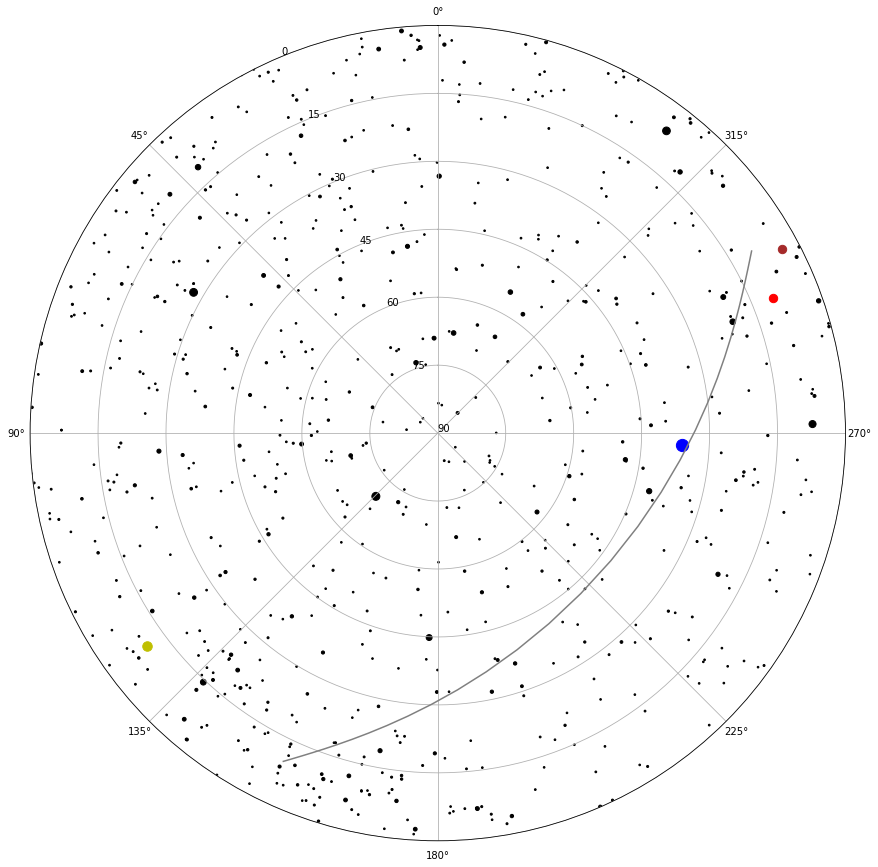

In [15]:
satellite_pass = satephem.passes[26]
chart = skychart.AltAzFullSkyChart(satellite_pass.topos + earth, satellite_pass.start_time)
chart.plot_stars(bright_stars)
chart.plot_ephemeris_object(ephemeris['sun'], 150, 'y')
chart.plot_ephemeris_object(ephemeris['moon'], 150, 'b')
chart.plot_ephemeris_object(ephemeris['mercury'], 70, 'brown')
chart.plot_ephemeris_object(ephemeris['venus'], 90, 'g')
chart.plot_ephemeris_object(ephemeris['mars'], 70, 'r')
chart.plot_ephemeris_object(ephemeris['JUPITER BARYCENTER'], 90, 'y')
chart.plot_ephemeris_object(ephemeris['SATURN BARYCENTER'], 80, 'y')
chart.plot_satellite_pass(satellite_pass)
chart.display()

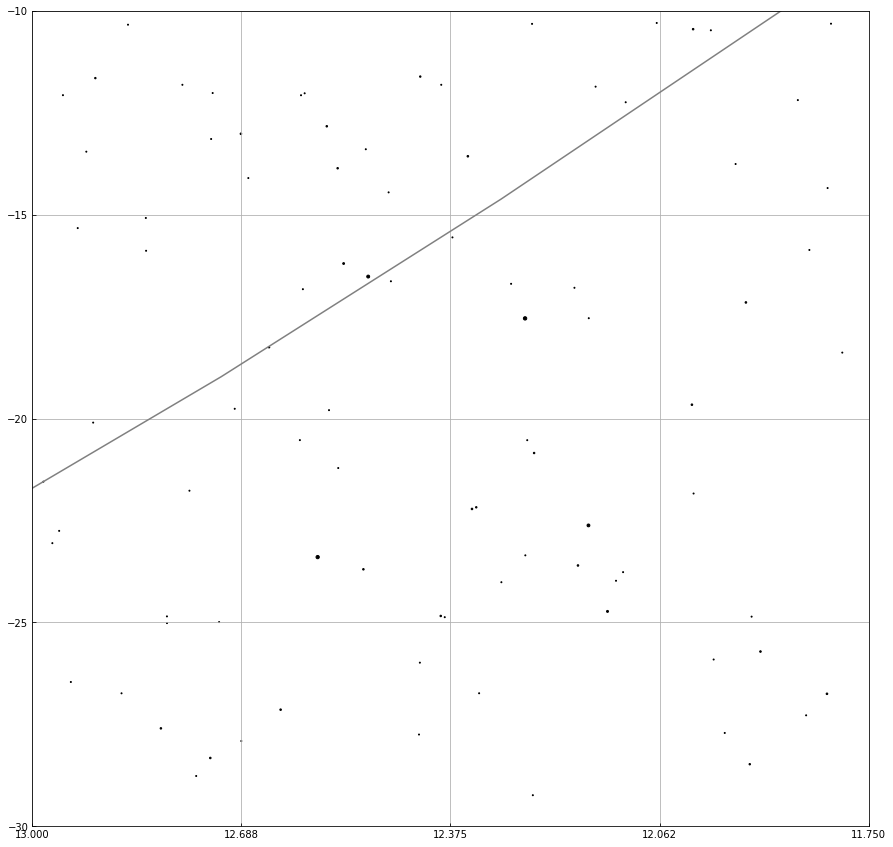

In [16]:
chart = skychart.RADecSkyChart(satellite_pass.topos + earth, satellite_pass.start_time, (13.0, 11.75), (-30, -10))
chart.plot_stars(more_stars)
chart.plot_satellite_pass(satellite_pass)
chart.display()